# CSCE-509 Pattern Recognition - Assignment I
### Gabriel C. Trahan - C00058009

## Contents:
* [Part 0: Data Creation](#part-0-data-creation)
* [Part 1: Perceptron](#part-1-perceptron)
* Part 2: Linear SVM
* Part 3: Non-linear SVM
* Part 4: Mismatch Between Training & Test Data
* Part 5: High Variance

## Part 0: Data Creation

* Generate a 2d, two-class data set.
    * **Class 0**: Uniformly distributed in the (union of) 3 squares: $[-1, 0]~x~[-1, 0] + [-1, 0]~x~[0, 1] + [0, 1]~x~[-1, 0]$
    * **Class 1**: Gaussian distributed centered at $(0.5, 0.5)$, with variance $(0.5, 0.5)$
* Generate 150 points in **Class 0** and 50 points in **Class 1**.
* Plot the points in both classes, using a different color for each class.

Class 0 shape: (150, 2)
Class 1 shape: (50, 2)


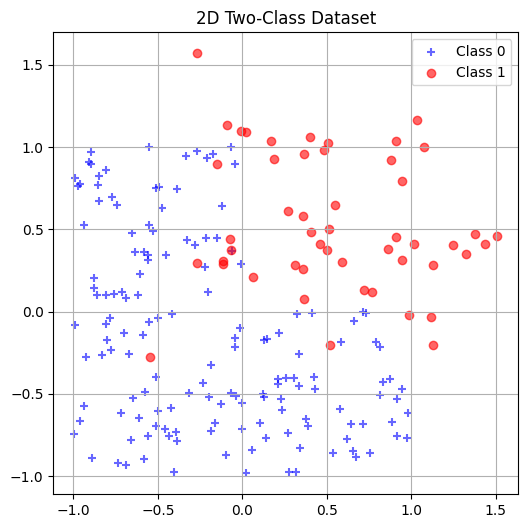

In [20]:
"""Generate dataset."""

from matplotlib.pyplot  import figure, grid, legend, scatter, show, title
from numpy              import ndarray, vstack
from numpy.random       import normal, uniform

# Generate Class 0:
class_0:    ndarray =   vstack([
                            # Square 1: [-1, 0] x [-1, 0] x 50
                            uniform(low = [-1, -1], high = [0, 0], size = (50, 2)),
                            
                            # Square 2: [-1, 0] x [0, 1] x 50
                            uniform(low = [-1, 0],  high = [0, 1], size = (50, 2)),
                            
                            # Square 3: [0, 1] x [-1, 0] x 50
                            uniform(low = [0, -1],  high = [1, 0], size = (50, 2))
                        ])

# Verify shape of Class 0.
print(f"Class 0 shape: {class_0.shape}")

# Generate Class 1: 50 data points normally distributed around [0.5, 0.5], with variance [0.5, 0.5]
class_1:    ndarray =   normal(loc = [0.5, 0.5], scale = [0.5, 0.5], size = (50, 2))

# Verify shape of Class 1.
print(f"Class 1 shape: {class_1.shape}")

# Initialize figure.
figure(figsize = (6, 6))

# Plot Class 0.
scatter(class_0[:, 0], class_0[:, 1], color = "blue", marker = "+", label = "Class 0", alpha = 0.6)

# Plot Class 1.
scatter(class_1[:, 0], class_1[:, 1], color = "red", marker = "o",  label = "Class 1", alpha = 0.6)

# Define title.
title("2D Two-Class Dataset")

# Generate legend.
legend()

# Enable grid lines for distribution validation.
grid(visible = True)

# Display plot.
show()

## Part 1: Perceptron

* Implement a Perceptron classifier to separate the two classes (generated in the previous section).
* Use a test set of 50 points from Class 0 and 50 points from Class 1 to evaluate the performance of the classifier.
* Use 4-fold cross validation to report the accuracy, precision, recall, & AUROC metrics. Report the variance of the accuracy across 4 runs.

In [ ]:
"""Train a perceptron on equal parts of classes 0 & 1 and report metrics."""

from matplotlib.pyplot          import plot, show
from numpy                      import concatenate, linspace, ones, var
from numpy.random               import permutation
from sklearn.linear_model       import Perceptron
from sklearn.metrics            import roc_auc_score
from sklearn.model_selection    import cross_val_predict, cross_val_score, KFold

# Generate class targets.
class_0_targets:    ndarray =       -ones(shape = 50)
class_1_targets:    ndarray =        ones(shape = 50)

# Concatenate datasets into 1 for training (50 from each class).
x_data:             ndarray =       concatenate((class_0[:50], class_1), axis = 0)

# Verify shape of X.
print(f"X-data shape: {x_data.shape}")

# Concatenate targets into 1 for training (50 from each class).
y_data:             ndarray =       concatenate((class_0_targets[:50], class_1_targets))

# Verify shape of targets.
print(f"Y-data shape: {y_data.shape}")

# Create shuffled index.
shuffle:            ndarray =       permutation(100)

# Rearrange samples and targets according to shuffle.
x_data, y_data =                    x_data[shuffle], y_data[shuffle]

# Initialize perceptron.
classifier:         Perceptron =    Perceptron()

# Fit data to perceptron.
classifier.fit(X = x_data, y = y_data)

# Print solution contrived by classifier.
print(f"Solution: {classifier.coef_[0][0]}x_0 + {classifier.coef_[0][1]}x_1 + {classifier.intercept_} = 0  (over {classifier.n_iter_} iterations)")

# Initialize 4-fold training regiment.
fold:               KFold =         KFold(n_splits = 4, shuffle = True)

# Get accuracy.
accuracy:   list =  cross_val_score(estimator = classifier, X = x_data, y = y_data, cv = fold, scoring = "accuracy")

# Calculate and print metrics.
print("\nCross Validation Results:")
print(f"""Accuracy:     {accuracy}""")
print(f"""Precision:    {cross_val_score(estimator = classifier, X = x_data, y = y_data, cv = fold, scoring = "precision")}""")
print(f"""Recall:       {cross_val_score(estimator = classifier, X = x_data, y = y_data, cv = fold, scoring = "recall")}""")
print(f"""AUROC:        {roc_auc_score(y_true = y_data, y_score = cross_val_predict(estimator = classifier, X = x_data, y = y_data, cv = fold))}""")
print(f"""Variance:     {var(accuracy)}""")

X-data shape: (100, 2)
Y-data shape: (100,)
Solution: 1.6246173038640819x_0 + 2.3113678175189962x_1 + [0.] = 0  (over 6 iterations)

Cross Validation Results:
Accuracy:     [0.96 0.96 1.   0.96]
Precision:    [0.61111111 1.         1.         1.        ]
Recall:       [0.9 1.  1.  1. ]
AUROC:        0.8900000000000001
Variance:     0.00030000000000000057
